In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from functools import reduce

# Gather data from csv files

In [2]:
# Get list of files in directory
csv_files = [csv for csv in os.listdir() if csv.startswith('cart')]

In [3]:
# Create list of df
df_list= [pd.read_csv(x) for x in csv_files]

In [4]:
# Iterate over df_list and change Price label according to Date
for df in df_list:
    df.sort_values('Item', inplace=True)
    df.drop_duplicates('Item', inplace=True)
    df['Price'] = [x.strip('$c') for x in df['Price']]
    
    for x in df['Price']:
        df['Price'] = df['Price'].astype(float)

    #date = pd.to_datetime(df['Date']).max().strftime('%m-%d-%Y') # grab max date
    #df.rename(columns={'Price': date}, inplace=True) # change column label to date
    #df.drop(columns='Date', inplace=True) # Remove columns no longer needed

df_list

[                                                  Item  Price        Date
 821                                    1  Gold "5"1 ea   6.00  2020-04-17
 828                  10-Inch Round Roaster 4-7 lbs1 ea   9.98  2020-04-17
 794                               18ct Forks, Gold1 ea   1.25  2020-04-17
 808                  3MCommand Hooks Value Pack, S1 ea  10.98  2020-04-17
 810                         3MPainter's Tape 36 mm1 ea   7.98  2020-04-17
 ..                                                 ...    ...         ...
 423  ZeroodlePremium Shirataki Penne With Oat Fiber...   4.48  2020-04-17
 216                         Ziggy'sChicken Strips200 g   5.00  2020-04-17
 221                   Ziggy'sPotato & Egg Salad1.25 kg   4.98  2020-04-17
 972                                           Zucchini   1.22  2020-04-17
 695   uTemp 10 Second Flex Tip Digital Thermometer1 ea  14.98  2020-04-17
 
 [760 rows x 3 columns],
                                                     Item  Price        D

# Visualization

In [5]:
df = pd.concat(df_list)

In [6]:
df.sort_values('Item')

,Item,Price,Date
24249,"""It's a boy"" Cake Topper Blue Glitter1 ea",2.50,2020-04-26
24893,"""It's a girl"" Cake Topper Pink Glitter1 ea",2.50,2020-04-26
24316,"""It's a girl"" Cake Topper Pink Glitter1 ea",2.50,2020-04-22
15387,#10 6MM Bamboo Needles 35MM1 ea,4.98,2020-04-26
16739,#10 6MM Knitting Needles 35MM1 ea,5.48,2020-04-22
...,...,...,...
20998,uTemp 10 Second Flex Tip Digital Thermometer1 ea,14.98,2020-04-22
21292,uTherm Children's Animal Thermometer1 ea,14.98,2020-04-22
21511,uTravel Anti-Nausea Wristbands1 ea,14.98,2020-04-26
21514,uTravel Anti-Nausea Wristbands1 ea,14.98,2020-04-22


In [7]:
df.drop_duplicates(['Item'], keep='last').sort_values('Item')

,Item,Price,Date
24249,"""It's a boy"" Cake Topper Blue Glitter1 ea",2.50,2020-04-26
24316,"""It's a girl"" Cake Topper Pink Glitter1 ea",2.50,2020-04-22
15387,#10 6MM Bamboo Needles 35MM1 ea,4.98,2020-04-26
16739,#10 6MM Knitting Needles 35MM1 ea,5.48,2020-04-22
16465,#11 8MM Bamboo Needles 35MM1 ea,5.48,2020-04-22
...,...,...,...
20670,uSwim Soft Wax Ear Plugs12 ea,6.98,2020-04-22
20998,uTemp 10 Second Flex Tip Digital Thermometer1 ea,14.98,2020-04-22
21292,uTherm Children's Animal Thermometer1 ea,14.98,2020-04-22
21514,uTravel Anti-Nausea Wristbands1 ea,14.98,2020-04-22


In [8]:
df_main = df.pivot(index='Item',
        columns='Date',
         values='Price'
        ).fillna(0)

In [9]:
df_main

Date,2020-03-17,2020-04-17,2020-04-22,2020-04-26
Item,,,,
"""It's a boy"" Cake Topper Blue Glitter1 ea",0.0,0.00,0.00,2.50
"""It's a girl"" Cake Topper Pink Glitter1 ea",0.0,0.00,2.50,2.50
#10 6MM Bamboo Needles 35MM1 ea,0.0,0.00,0.00,4.98
#10 6MM Knitting Needles 35MM1 ea,0.0,0.00,5.48,5.48
#11 8MM Bamboo Needles 35MM1 ea,0.0,0.00,5.48,5.48
...,...,...,...,...
uSwim Soft Wax Ear Plugs12 ea,0.0,0.00,6.98,6.98
uTemp 10 Second Flex Tip Digital Thermometer1 ea,0.0,14.98,14.98,0.00
uTherm Children's Animal Thermometer1 ea,0.0,0.00,14.98,0.00


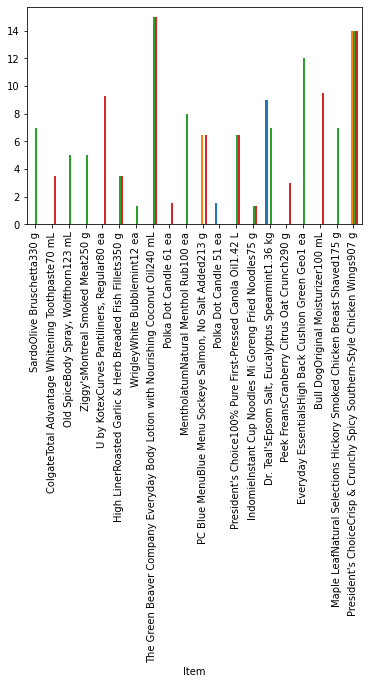

In [10]:
df_main.sample(20).plot(kind='bar', rot=90, legend=False)